In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/^SPX.csv')

In [3]:
# 月末データのみ抽出
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
monthly_df = df.groupby('Month').last().reset_index()

In [4]:
monthly_df.tail()

,Month,Date,Open,High,Low,Close,Adj Close,Volume
1149,2023-09,2023-09-29,4328.180176,4333.149902,4274.859863,4288.049805,4288.049805,3865960000
1150,2023-10,2023-10-31,4171.330078,4195.549805,4153.120117,4193.799805,4193.799805,4249470000
1151,2023-11,2023-11-30,4554.870117,4569.890137,4537.240234,4567.799805,4567.799805,5399300000
1152,2023-12,2023-12-29,4782.879883,4788.430176,4751.990234,4769.830078,4769.830078,3126060000
1153,2024-01,2024-01-05,4690.569824,4721.490234,4682.109863,4697.240234,4697.240234,3844370000


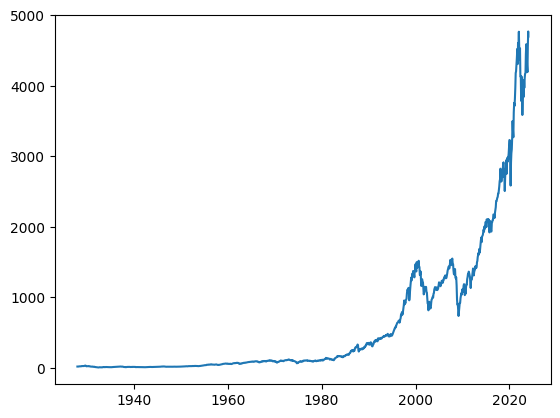

In [5]:
x = monthly_df['Date']
y = monthly_df['Close']

fig = plt.figure()
ax = fig.add_subplot(111, xlabel="", ylabel="")
ax.plot(x, y)
fig.savefig("sp500.png")

In [6]:
data = monthly_df[(monthly_df['Date']>='2000-01-01') & (monthly_df['Date']<'2024-01-01')]

In [7]:
data.head()

,Month,Date,Open,High,Low,Close,Adj Close,Volume
865,2000-01,2000-01-31,1360.160034,1394.479980,1350.140015,1394.459961,1394.459961,993800000
866,2000-02,2000-02-29,1348.050049,1369.630005,1348.050049,1366.420044,1366.420044,1204300000
867,2000-03,2000-03-31,1487.920044,1519.810059,1484.380005,1498.579956,1498.579956,1227400000
868,2000-04,2000-04-28,1464.920044,1473.619995,1448.150024,1452.430054,1452.430054,984600000
869,2000-05,2000-05-31,1422.439941,1434.489990,1415.500000,1420.599976,1420.599976,960500000


In [8]:
buy_amount = 100
data.loc[:,'Quantity']=buy_amount / data['Close']

/tmp/ipykernel_201/1004822605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'Quantity']=buy_amount / data['Close']


In [9]:
data.head()

,Month,Date,Open,High,Low,Close,Adj Close,Volume,Quantity
865,2000-01,2000-01-31,1360.160034,1394.479980,1350.140015,1394.459961,1394.459961,993800000,0.071712
866,2000-02,2000-02-29,1348.050049,1369.630005,1348.050049,1366.420044,1366.420044,1204300000,0.073184
867,2000-03,2000-03-31,1487.920044,1519.810059,1484.380005,1498.579956,1498.579956,1227400000,0.066730
868,2000-04,2000-04-28,1464.920044,1473.619995,1448.150024,1452.430054,1452.430054,984600000,0.068850
869,2000-05,2000-05-31,1422.439941,1434.489990,1415.500000,1420.599976,1420.599976,960500000,0.070393


In [10]:
data.tail()

,Month,Date,Open,High,Low,Close,Adj Close,Volume,Quantity
1148,2023-08,2023-08-31,4517.009766,4532.259766,4507.390137,4507.660156,4507.660156,3946360000,0.022184
1149,2023-09,2023-09-29,4328.180176,4333.149902,4274.859863,4288.049805,4288.049805,3865960000,0.023321
1150,2023-10,2023-10-31,4171.330078,4195.549805,4153.120117,4193.799805,4193.799805,4249470000,0.023845
1151,2023-11,2023-11-30,4554.870117,4569.890137,4537.240234,4567.799805,4567.799805,5399300000,0.021892
1152,2023-12,2023-12-29,4782.879883,4788.430176,4751.990234,4769.830078,4769.830078,3126060000,0.020965


In [11]:
data.loc[:,'TotalQt']=data['Quantity'].cumsum()

/tmp/ipykernel_201/3471908975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'TotalQt']=data['Quantity'].cumsum()


In [12]:
data.loc[:,'TotalAm']=data['Close']*data['TotalQt']

/tmp/ipykernel_201/3363117449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'TotalAm']=data['Close']*data['TotalQt']


In [13]:
data.loc[:,'BuyAm']=buy_amount
data.loc[:,'Ganpon']=data['BuyAm'].cumsum()

/tmp/ipykernel_201/1985622261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'BuyAm']=buy_amount
/tmp/ipykernel_201/1985622261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'Ganpon']=data['BuyAm'].cumsum()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


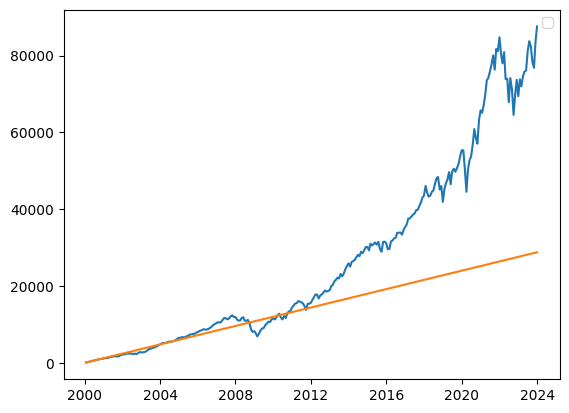

In [14]:
x = data['Date']
y1 = data['TotalAm']
y2 = data['Ganpon']

fig = plt.figure()
ax = fig.add_subplot(111, xlabel="", ylabel="")
ax.plot(x, y1)
ax.plot(x, y2)
ax.legend()
fig.savefig("tsumitate.png")